# Redimensionalización

Para cambiar el tamaño de una imagen, OpenCV viene con la función cv2.resize(). El tamaño deseado de la imagen final se puede especificar manualmente, o se puede indicar especificando un factor de escala. La función usa diferentes métodos de interpolación, siendo los más usados: cv2.INTER_AREA, para contraer la imagen y cv2.INTER_CUBIC (suave) & cv2.INTER_LINEAR, para acercar la imagen. El método de interpolación utilizado por defecto es cv2.INTER_LINEAR, que  sirve para cualquier cambio de tamaño que se desee realizar. Cualquiera de los métodos mostrados a continuación, pueden ser utilizados para cambiar el tamaño de una imagen

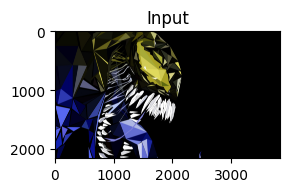

In [13]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
 
img = cv2.imread('./Veno_Wallp.jpg')
 
#Indicando el factor de escala
res = cv2.resize(img,None,fx=2, fy=2, interpolation = cv2.INTER_CUBIC)
 
# Indicando manualmente el nuevo tamaño deseado de la iamgen
height, width = img.shape[:2]
res = cv2.resize(img,(2*width, 2*height), interpolation = cv2.INTER_CUBIC)

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.show()

# Traslación

Una traslación es el desplazamiento de la posición de un objeto. Si se conoce la magnitud del desplazamiento (t_x,t_y) en las direcciones x e y, respectivamente,  se puede escribir la matriz de transformación M. La matriz M se puede crear utilizando la función np.float32 de la librería Numpy (ver curso introductorio). Esta matriz luego se pasa como argumento a la función cv2.warpAffine(). Observa el siguiente ejemplo para un desplazamiento de (210, 20).

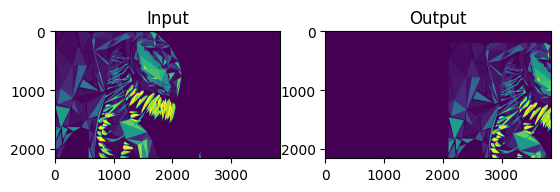

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
 
img = cv2.imread('./Veno_Wallp.jpg',0)
rows,cols = img.shape
 
M = np.float32([[1,0,2100],[0,1,200]])
dst = cv2.warpAffine(img,M,(cols,rows))
 
cv2.imshow('img',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

# Rotación

OpenCV proporciona la función cv2.getRotationMatrix2D. Compruebe a continuación un ejemplo en el cual se gira la imagen 45 grados con respecto al centro sin aplicar ningún factor de escala.

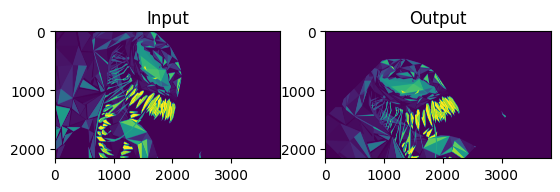

In [16]:
import matplotlib.pyplot as plt 
img = cv2.imread('./Veno_Wallp.jpg',0)
rows,cols = img.shape
 
M = cv2.getRotationMatrix2D((cols/2,rows/2),45,1)
dst = cv2.warpAffine(img,M,(cols,rows))

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

# Transformación Afín

En una transformación afín todas las líneas paralelas en la imagen original seguirán siendo paralelas en la imagen de salida. Para encontrar la matriz de transformación, necesitamos tres puntos de la imagen de entrada y sus ubicaciones correspondientes en la imagen de salida. Luego cv2.getAffineTransform creará una matriz 2×3 que se pasará a cv2.warpAffine.

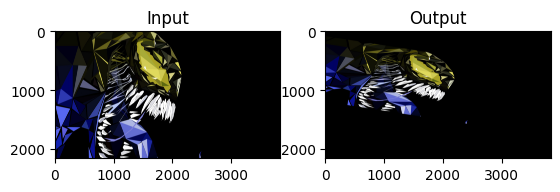

In [15]:
import numpy as np
import matplotlib.pyplot as plt #carga la librería para graficar
import cv2
 
img = cv2.imread('./Veno_Wallp.jpg')
rows,cols,ch = img.shape
 
pts1 = np.float32([[100,400],[400,100],[100,100]])
pts2 = np.float32([[50,300],[400,200],[80,150]])
 
 
M = cv2.getAffineTransform(pts1,pts2)
dst = cv2.warpAffine(img,M,(cols,rows))
 
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

# Transformación de Perspectiva

Para realizar una transformación de perspectiva es necesario especificar una matriz de 3×3. Luego de aplicar este tipo de transformación, las líneas rectas permanecerán rectas. Para generar la matriz de 3×3 es necesario  indicar cuatro puntos sobre la imagen de inicial y los correspondientes  puntos sobre la imagen resultante. Tres de los cuatro puntos, tienen que ser no-colineales. De esta manera la matriz de transformación puede ser generada utilizando la función cv2.getPerspectiveTransform. Luego, para aplicar la transformación, se utiliza cv2.warpPerspective teniendo en cuenta la matriz de 3×3 generada con la función anterior.

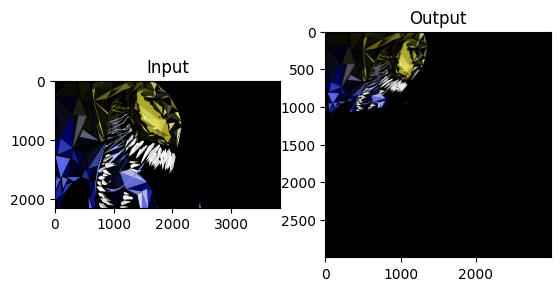

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

img = cv2.imread('./Veno_Wallp.jpg')
rows,cols,ch = img.shape

pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])

M = cv2.getPerspectiveTransform(pts1,pts2)

dst = cv2.warpPerspective(img,M,(3000,3000))

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()